In [1]:
import tensorcircuit as tc
import optax
import jax.numpy as jnp
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
n = 8

In [3]:
K = tc.set_backend('jax')

In [4]:
# numpy data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0


def filter_pair(x, y, a, b):
    keep = (y == a) | (y == b)
    x, y = x[keep], y[keep]
    y = y == a
    return x, y

In [5]:
def loss(params, x, y, k, out):
    c = tc.Circuit(n, inputs=x)
    for j in range(k):
        for i in range(n - 1):
            c.cnot(i, i + 1)
        for i in range(n):
            c.rx(i, theta=params[2 * j, i])
            c.ry(i, theta=params[2 * j + 1, i])
    y_pred = (jnp.real(c.expectation([tc.gates.z(), [out,]])) + 1) / 2
    return -(y * jnp.log(y_pred) + (1 - y) * jnp.log(1 - y_pred))
loss = K.jit(loss, static_argnums=[3, 4])

In [6]:
def accuracy(params, x, y, k, out):
    c = tc.Circuit(n, inputs=x)
    for j in range(k):
        for i in range(n - 1):
            c.cnot(i, i + 1)
        for i in range(n):
            c.rx(i, theta=params[2 * j, i])
            c.ry(i, theta=params[2 * j + 1, i])
    y_pred = jnp.round((jnp.real(c.expectation([tc.gates.z(), [out,]])) + 1) / 2)
    return y_pred == y
accuracy = K.jit(accuracy, static_argnums=[3, 4])

In [7]:
k = 6

In [8]:
compute_loss = K.vectorized_value_and_grad(loss, vectorized_argnums=[1, 2])
compute_accuracy = K.vmap(accuracy, vectorized_argnums=[1, 2])

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

epoch 0, 0/99: loss=0.7334, acc=0.3516
epoch 0, 30/99: loss=0.6179, acc=0.8672
epoch 0, 60/99: loss=0.5400, acc=0.8594
epoch 0, 90/99: loss=0.4897, acc=0.8828
epoch 1, 0/99: loss=0.5097, acc=0.8594
epoch 1, 30/99: loss=0.4656, acc=0.8906
epoch 1, 60/99: loss=0.4181, acc=0.8906
epoch 1, 90/99: loss=0.4082, acc=0.9062
epoch 2, 0/99: loss=0.4062, acc=0.9062
epoch 2, 30/99: loss=0.4116, acc=0.8906
epoch 2, 60/99: loss=0.3895, acc=0.9297
epoch 2, 90/99: loss=0.3845, acc=0.9609
epoch 3, 0/99: loss=0.4005, acc=0.8828
epoch 3, 30/99: loss=0.3882, acc=0.9141
epoch 3, 60/99: loss=0.3728, acc=0.9453
epoch 3, 90/99: loss=0.3977, acc=0.9531
epoch 4, 0/99: loss=0.3767, acc=0.9062
epoch 4, 30/99: loss=0.3927, acc=0.8828
epoch 4, 60/99: loss=0.3663, acc=0.9297
epoch 4, 90/99: loss=0.3844, acc=0.9375


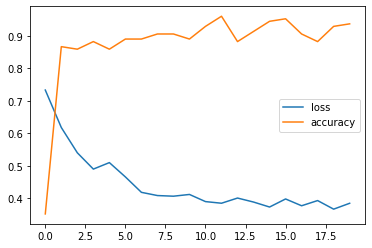

  0%|          | 0/5 [00:00<?, ?it/s]

epoch 0, 0/93: loss=0.6891, acc=0.5000
epoch 0, 30/93: loss=0.5625, acc=0.9688
epoch 0, 60/93: loss=0.5255, acc=0.9766
epoch 0, 90/93: loss=0.5021, acc=1.0000
epoch 1, 0/93: loss=0.5036, acc=0.9609
epoch 1, 30/93: loss=0.4823, acc=0.9609
epoch 1, 60/93: loss=0.4809, acc=0.9688
epoch 1, 90/93: loss=0.4688, acc=0.9609
epoch 2, 0/93: loss=0.4859, acc=0.9141
epoch 2, 30/93: loss=0.4688, acc=0.9453
epoch 2, 60/93: loss=0.4716, acc=0.9766
epoch 2, 90/93: loss=0.4628, acc=1.0000
epoch 3, 0/93: loss=0.4739, acc=0.9531
epoch 3, 30/93: loss=0.4509, acc=0.9688
epoch 3, 60/93: loss=0.4613, acc=0.9453
epoch 3, 90/93: loss=0.4584, acc=0.9688
epoch 4, 0/93: loss=0.4549, acc=0.9688
epoch 4, 30/93: loss=0.4327, acc=0.9609
epoch 4, 60/93: loss=0.4575, acc=0.9297
epoch 4, 90/93: loss=0.4343, acc=0.9609


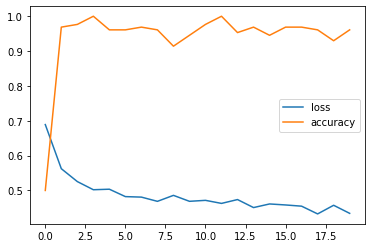

  0%|          | 0/5 [00:00<?, ?it/s]

epoch 0, 0/95: loss=0.6665, acc=0.6641
epoch 0, 30/95: loss=0.5680, acc=0.9531
epoch 0, 60/95: loss=0.5347, acc=0.9453
epoch 0, 90/95: loss=0.5038, acc=0.9688
epoch 1, 0/95: loss=0.5083, acc=0.9766
epoch 1, 30/95: loss=0.4926, acc=0.9766
epoch 1, 60/95: loss=0.4810, acc=0.9531
epoch 1, 90/95: loss=0.4869, acc=0.9688
epoch 2, 0/95: loss=0.4841, acc=0.9844
epoch 2, 30/95: loss=0.4671, acc=0.9922
epoch 2, 60/95: loss=0.4524, acc=0.9922
epoch 2, 90/95: loss=0.4487, acc=0.9844
epoch 3, 0/95: loss=0.4728, acc=0.9766
epoch 3, 30/95: loss=0.4658, acc=0.9922
epoch 3, 60/95: loss=0.4561, acc=0.9922
epoch 3, 90/95: loss=0.4594, acc=1.0000
epoch 4, 0/95: loss=0.4750, acc=0.9609
epoch 4, 30/95: loss=0.4500, acc=0.9844
epoch 4, 60/95: loss=0.4318, acc=1.0000
epoch 4, 90/95: loss=0.4448, acc=0.9922


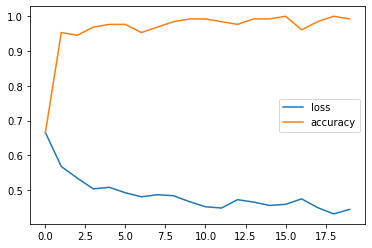

  0%|          | 0/5 [00:00<?, ?it/s]

epoch 0, 0/92: loss=0.7230, acc=0.4141
epoch 0, 30/92: loss=0.5665, acc=0.9531
epoch 0, 60/92: loss=0.4983, acc=0.9531
epoch 0, 90/92: loss=0.4442, acc=1.0000
epoch 1, 0/92: loss=0.4564, acc=0.9844
epoch 1, 30/92: loss=0.4324, acc=1.0000
epoch 1, 60/92: loss=0.4480, acc=0.9844
epoch 1, 90/92: loss=0.4181, acc=0.9922
epoch 2, 0/92: loss=0.4323, acc=0.9922
epoch 2, 30/92: loss=0.4202, acc=1.0000
epoch 2, 60/92: loss=0.4525, acc=0.9688
epoch 2, 90/92: loss=0.4262, acc=0.9922
epoch 3, 0/92: loss=0.4367, acc=0.9766
epoch 3, 30/92: loss=0.4314, acc=1.0000
epoch 3, 60/92: loss=0.4369, acc=0.9922
epoch 3, 90/92: loss=0.4269, acc=0.9922
epoch 4, 0/92: loss=0.4384, acc=0.9766
epoch 4, 30/92: loss=0.4272, acc=1.0000
epoch 4, 60/92: loss=0.4327, acc=0.9766
epoch 4, 90/92: loss=0.4203, acc=1.0000


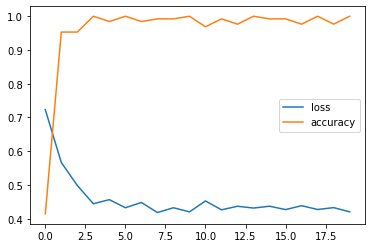

  0%|          | 0/5 [00:00<?, ?it/s]

epoch 0, 0/89: loss=0.7111, acc=0.4297
epoch 0, 30/89: loss=0.6030, acc=0.7891
epoch 0, 60/89: loss=0.5710, acc=0.8828
epoch 1, 0/89: loss=0.5458, acc=0.9219
epoch 1, 30/89: loss=0.5357, acc=0.8984
epoch 1, 60/89: loss=0.5319, acc=0.9297
epoch 2, 0/89: loss=0.5135, acc=0.9688
epoch 2, 30/89: loss=0.5118, acc=0.9297
epoch 2, 60/89: loss=0.5109, acc=0.9297
epoch 3, 0/89: loss=0.4834, acc=0.9766
epoch 3, 30/89: loss=0.4933, acc=0.9453
epoch 3, 60/89: loss=0.4932, acc=0.9688
epoch 4, 0/89: loss=0.4689, acc=0.9922
epoch 4, 30/89: loss=0.4795, acc=0.9609
epoch 4, 60/89: loss=0.4844, acc=0.9766


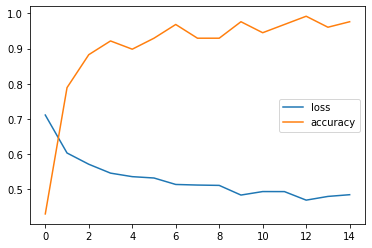

  0%|          | 0/5 [00:00<?, ?it/s]

epoch 0, 0/93: loss=0.6795, acc=0.5703
epoch 0, 30/93: loss=0.5535, acc=0.9297
epoch 0, 60/93: loss=0.5571, acc=0.8984
epoch 0, 90/93: loss=0.4993, acc=0.9844
epoch 1, 0/93: loss=0.5069, acc=0.9688
epoch 1, 30/93: loss=0.4708, acc=0.9375
epoch 1, 60/93: loss=0.4952, acc=0.9297
epoch 1, 90/93: loss=0.4634, acc=0.9688
epoch 2, 0/93: loss=0.4550, acc=0.9609
epoch 2, 30/93: loss=0.4302, acc=1.0000
epoch 2, 60/93: loss=0.4623, acc=0.9297
epoch 2, 90/93: loss=0.4429, acc=0.9688
epoch 3, 0/93: loss=0.4356, acc=0.9844
epoch 3, 30/93: loss=0.4244, acc=0.9688
epoch 3, 60/93: loss=0.4578, acc=0.9219
epoch 3, 90/93: loss=0.4206, acc=0.9844
epoch 4, 0/93: loss=0.4170, acc=0.9844
epoch 4, 30/93: loss=0.4116, acc=0.9844
epoch 4, 60/93: loss=0.4445, acc=0.9297
epoch 4, 90/93: loss=0.4143, acc=0.9688


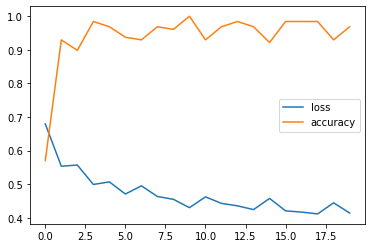

In [10]:
params_list = []
for node in tqdm(range(6)):
    x_train_node, y_train_node = filter_pair(x_train, y_train, 0, node + 1)
    x_train_small = tf.image.resize(x_train_node[..., tf.newaxis], (int(2**(n/2)), int(2**(n/2)))).numpy()[..., 0].reshape(-1, 2**n)
    x_train_small = x_train_small / jnp.sqrt(jnp.sum(x_train_small**2, axis=-1, keepdims=True))
    data = tf.data.Dataset.from_tensor_slices((x_train_small, y_train_node)).shuffle(100).batch(128)

    params = K.randn((k * 2, n), dtype=jnp.float32)
    opt = optax.adam(learning_rate=1e-2)
    opt_state = opt.init(params)

    loss_list = []
    acc_list = []
    for e in tqdm(range(5)):
        for i, (x, y) in enumerate(data):
            x = x.numpy()
            y = y.numpy()
            loss_val, grad_val = compute_loss(params, x, y, k, node)
            updates, opt_state = opt.update(grad_val, opt_state, params)
            params = optax.apply_updates(params, updates)
            loss_mean = jnp.mean(loss_val)
            if i % 30 == 0:
                acc = jnp.mean(compute_accuracy(params, x, y, k, node))
                acc_list.append(acc)
                loss_list.append(loss_mean)
                print(f'epoch {e}, {i}/{len(data)}: loss={loss_mean:.4f}, acc={acc:.4f}')

    plt.plot(loss_list)
    plt.plot(acc_list)
    plt.legend(['loss', 'accuracy'])
    plt.show()

    params_list.append(params)


In [11]:
def pred(params, x, y, k):
    c = tc.Circuit(n, inputs=x)
    for j in range(k):
        for i in range(n - 1):
            c.cnot(i, i + 1)
        for i in range(n):
            c.rx(i, theta=params[2 * j, i])
            c.ry(i, theta=params[2 * j + 1, i])
    y_pred = jnp.round((jnp.real(c.expectation([tc.gates.z(), [0,]])) + 1) / 2)
    return y_pred
pred = K.jit(pred, static_argnums=[3])

In [12]:
density_est_list = []
p_node = []
for node in tqdm(range(6)):
    x_train_node, y_train_node = filter_pair(x_train, y_train, 0, node + 1)
    x_train_small = tf.image.resize(x_train_node[..., tf.newaxis], (int(2**(n/2)), int(2**(n/2)))).numpy()[..., 0].reshape(-1, 2**n)
    x_train_small = x_train_small / jnp.sqrt(jnp.sum(x_train_small**2, axis=-1, keepdims=True))
    dm = jnp.einsum('nij, njk -> nik', jnp.conjugate(x_train_small.reshape(-1, 2**n, 1)), x_train_small.reshape(-1, 1, 2**n))
    density_est_list.append(jnp.mean(dm, axis=0))
    p_node.append(len(x_train_small))
density_est_list = jnp.stack(density_est_list, axis=0)
p_node = jnp.stack(p_node, axis=0) / jnp.sum(jnp.array(p_node))

  0%|          | 0/6 [00:00<?, ?it/s]

In [13]:
p_node

DeviceArray([0.17700909, 0.16605172, 0.16846961, 0.16443047, 0.15854648,
             0.16549267], dtype=float32)

In [14]:
def pred_comb(params, x, k):
    dm_list = []
    for node in range(6):
        c = tc.Circuit(n, inputs=x)
        for j in range(k):
            for i in range(n - 1):
                c.cnot(i, i + 1)
            for i in range(n):
                c.rx(i, theta=params[node][2 * j, i])
                c.ry(i, theta=params[node][2 * j + 1, i])
        density_matrix = jnp.conjugate(c.wavefunction('ket')) @ c.wavefunction('bra')
        dm_list.append(density_matrix)

    projector = jnp.conjugate(x.reshape(-1, 1)) @ x.reshape(1, -1)
    weight = jnp.einsum('nij, ji -> n', density_est_list, projector).reshape(-1, 1, 1) * p_node.reshape(-1, 1, 1)
    weight = weight / jnp.sum(weight)
    dm = jnp.sum(jnp.stack(dm_list, axis=0) * weight, axis=0)
    # print(jnp.trace(dm))
    c = tc.DMCircuit(n, dminputs=dm)
    pred_prob = []
    for node in range(6):
        pred_prob.append((jnp.real(c.expectation([tc.gates.z(), [node,]])) + 1) / 2)
    return pred_prob
# pred_comb = K.jit(pred_comb, static_argnums=[2])

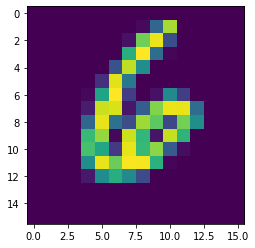

In [21]:
i = 1
plt.imshow(x_train_small[i].reshape(16, 16))

In [22]:
pred_comb(params_list, x_train_small[i], k)

[DeviceArray(0.43883738, dtype=float32),
 DeviceArray(0.46591565, dtype=float32),
 DeviceArray(0.48930246, dtype=float32),
 DeviceArray(0.5085356, dtype=float32),
 DeviceArray(0.50147146, dtype=float32),
 DeviceArray(0.4793412, dtype=float32)]

In [39]:
prediction = K.vmap(pred, vectorized_argnums=[1, 2])(params, x_train_small[:1000], y_train[:1000], k)

In [40]:
jnp.mean(y_train[:1000]*1.0==prediction)

DeviceArray(0.92, dtype=float32)